# Proyecto Final de Estadística
### Tema: Impacto del trabajo remoto en la salud mental.

#### Integrantes:

> Claudia Hernández Pérez         C-312

> Joel Aparicio Tamayo            C-312

> Kendry Javier del Pino Barbosa  C-312

A medida que el trabajo remoto se convierte en la nueva norma, es esencial comprender su impacto en el bienestar mental de los empleados. Este conjunto de datos analiza cómo trabajar de forma remota afecta los niveles de estrés, el equilibrio entre la vida laboral y personal, y las condiciones de salud mental en diversas industrias y regiones.

Con 5,000 registros recopilados de empleados de todo el mundo, este conjunto de datos proporciona información valiosa sobre áreas clave como la ubicación del trabajo (remoto, híbrido, en sitio), los niveles de estrés, el acceso a recursos de salud mental y la satisfacción laboral. Está diseñado para ayudar a investigadores, profesionales de recursos humanos y empresas a evaluar la creciente influencia del trabajo remoto en la productividad y el bienestar.

Adjunto a este archivo se provee el archivo ```Impact_of_Remote_Work_on_Mental_Health.csv``` con los datos anteriormente descritos.




In [46]:
# Bibliotecas necesarias
import numpy as np # Para realizar cálculos estadísticos.
import scipy.stats as stats  # Para realizar cálculos estadísticos.
import matplotlib.pyplot as plt # Para visualizar distribuciones y análisis gráficos.
import pandas as pd # Para cargar y manipular los datos.
import re # Para trabajar con expresiones regulares
from ipywidgets import interact, IntSlider

#### Cargar los datos
Primero, utilizaremos **Pandas** para cargar el conjunto de datos en un DataFrame. Este paso es crucial para acceder a la información y explorar las primeras filas del conjunto de datos para entender su estructura.

In [47]:
impact = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
impact.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,30,Non-binary,HR,Healthcare,13,Hybrid,28,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,38,Female,Data Scientist,IT,3,Remote,26,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,38,Non-binary,Software Engineer,Education,22,Hybrid,37,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,32,Male,Software Engineer,Finance,20,Onsite,41,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,24,Male,Sales,Consulting,32,Onsite,44,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [48]:
impact.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,34.950800,17.810200,36.375600,7.559000,2.984200,2.993800,3.007800
std,4.933239,10.020412,5.480596,4.636121,1.410513,1.394615,1.399046
min,20.000000,1.000000,19.000000,0.000000,1.000000,1.000000,1.000000
25%,32.000000,9.000000,33.000000,4.000000,2.000000,2.000000,2.000000
50%,35.000000,18.000000,36.000000,8.000000,3.000000,3.000000,3.000000
75%,38.000000,26.000000,40.000000,12.000000,4.000000,4.000000,4.000000
max,50.000000,35.000000,57.000000,15.000000,5.000000,5.000000,5.000000


In [49]:
impact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

## Análisis las distribuciones de satisfacción entre los trabajadores



In [50]:
satisfaction_counts = impact.groupby( 'Satisfaction_with_Remote_Work' )[ 'Satisfaction_with_Remote_Work' ].agg( 'count' )
satisfaction_counts

Satisfaction_with_Remote_Work
Neutral        1648
Satisfied      1675
Unsatisfied    1677
Name: Satisfaction_with_Remote_Work, dtype: int64

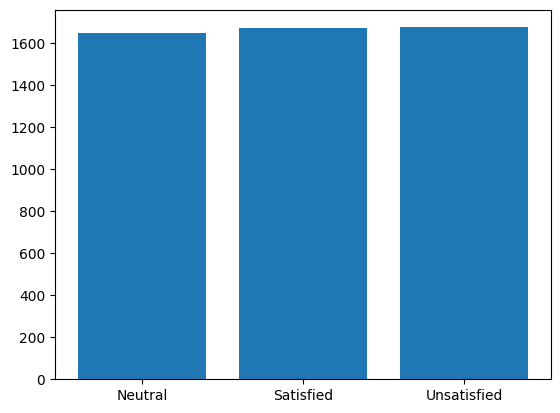

In [51]:
plt.bar( satisfaction_counts.index, satisfaction_counts.values )
plt.show()

### ¿Pero estos niveles de satisfacción que impacto puede tener en la salud mental de la población a nivel mundial?
Apoyándonos en que la minoría de nuestros datos está descontenta, ¿se podrá decir que la minoría de la población ha tenido que acceder a recursos de salud mental?

Probemos entonces que menos del 50% de los trabajadores a nivel mundial ha tenido que acceder a recursos de salud mental como resultado del trabajo remoto con un nivel de confianza de 90%.

$$H_0: \rho \geq 0.5$$

$$H_1: \rho < 0.5$$

Estadígrafo: $$\rho = \frac{\overline{\rho} - \rho_0}{\sqrt{\rho_0(1 - \rho_0)}} \sqrt{n}$$

Región crítica (n > 30): $$\rho < -Z_{1-\alpha}$$

In [52]:
resources_counts = impact.groupby( 'Access_to_Mental_Health_Resources' )[ 'Access_to_Mental_Health_Resources' ].agg( 'count' )
access_workers = resources_counts['Yes']
total_workers = len(impact)

# Parámetros dados
p_hat = access_workers / total_workers  # Proporción observada
p_0 = 0.5    # Proporción bajo la hipótesis nula
alpha = 0.1  # Nivel de significancia (1 - nivel de confianza)

# Calcular el estadístico de prueba
z = (p_hat - p_0) / np.sqrt(p_0 * (1 - p_0) / total_workers)

# Calcular el valor crítico para el nivel de significancia dado
z_alpha = stats.norm.ppf(1 - alpha)

# Determinar si rechazamos la hipótesis nula
if z < -z_alpha:
    print(f"Rechazamos la hipótesis nula H0")
else:
    print(f"No podemos rechazar la hipótesis nula H0")

Rechazamos la hipótesis nula H0


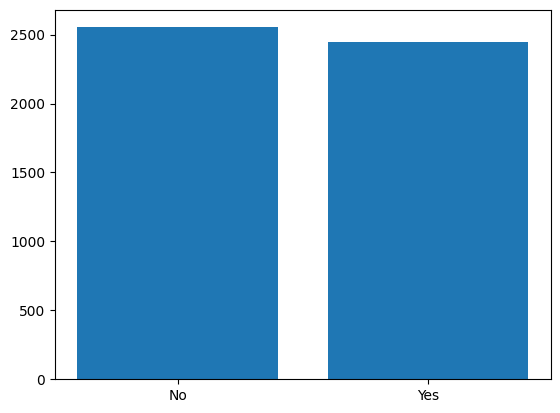

In [53]:
plt.bar( resources_counts.index, resources_counts.values )
plt.show()

#### Como se muestra, los niveles de satisfacción están directamente relacionados con la afectación de la salud mental de las personas en el trabajo remoto. Por lo que podría decirse que es una medida que ha resultado beneficiosa para la mayoría.

## Análisis de las edades de los encuestados

El código de abajo genera un gráfico de cajas y bigotes para visualizar la distribución de las edades de los encuestados. Un gráfico de cajas y bigotes es una representación gráfica que muestra la distribución de un conjunto de datos, destacando los valores atípicos y la dispersión de los datos. 

En un gráfico de cajas y bigotes, el cuadrado (también conocido como caja) representa el rango intercuartílico (IQR), que es la diferencia entre el cuartil superior (Q3) y el cuartil inferior (Q1). El cuartil inferior es el 25% de los datos más bajos, mientras que el cuartil superior es el 25% de los datos más altos.

Las líneas que se extienden desde la caja son llamadas "bigotes" y representan los valores atípicos. Los bigotes pueden ser de dos tipos: los que se extienden hasta el valor más alto o más bajo: no atípicos; y los que se extienden más allá de estos valores, indicando la presencia de valores atípicos.

Las bolitas (también conocidas como outliers) representan los valores atípicos, que son aquellos que se encuentran fuera de los límites definidos por los bigotes. Estos valores pueden ser considerados anómalos o inesperados en el conjunto de datos.



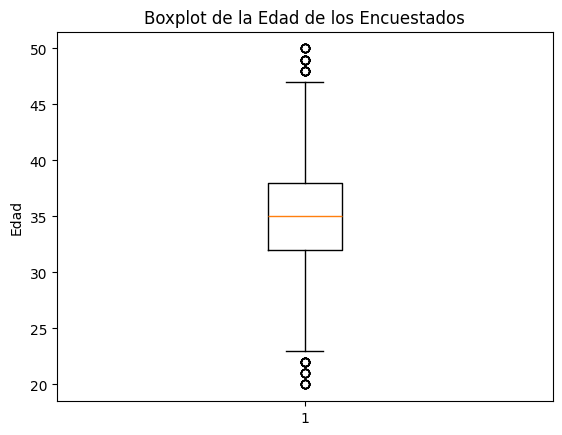

In [54]:
plt.boxplot(impact['Age'].dropna())
plt.ylabel('Edad')
plt.title('Boxplot de la Edad de los Encuestados')
plt.show()

### Aquí también se grafica la distribución de las edades, ahora en un histograma

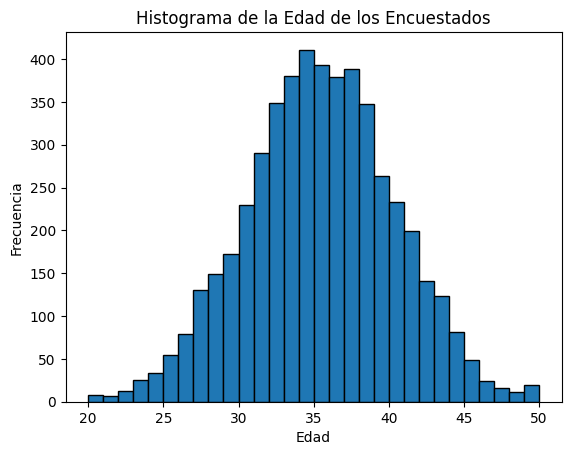

In [55]:
plt.hist(impact['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Edad de los Encuestados')
plt.show()

El histograma parece mostrar que las edades distribuyen normal. Tomemos dicha hipótesis e intentemos probarla: 

El siguiente bloque de código se enfoca en probar la hipótesis de normalidad de la distribución de las edades de los encuestados, utilizando la prueba de normalidad de D'Agostino-Pearson y visualizando los resultados a través de un histograma y un gráfico Q-Q.

Un gráfico Q-Q (Quantile-Quantile plot) es una herramienta gráfica utilizada para comparar la distribución de un conjunto de datos con una distribución teórica, como la distribución normal. El objetivo principal de un gráfico Q-Q es evaluar si los datos siguen una distribución específica.

Línea recta: Si los puntos en el gráfico Q-Q se alinean aproximadamente a lo largo de una línea recta, esto sugiere que los datos siguen la distribución teórica.

Desviaciones: Desviaciones significativas de la línea recta pueden indicar que los datos no siguen la distribución teórica.

Estadístico K2: 0.9932326970647298
Valor p: 0.6085864241032477
No se puede rechazar la hipótesis nula: los datos parecen provenir de una distribución normal.


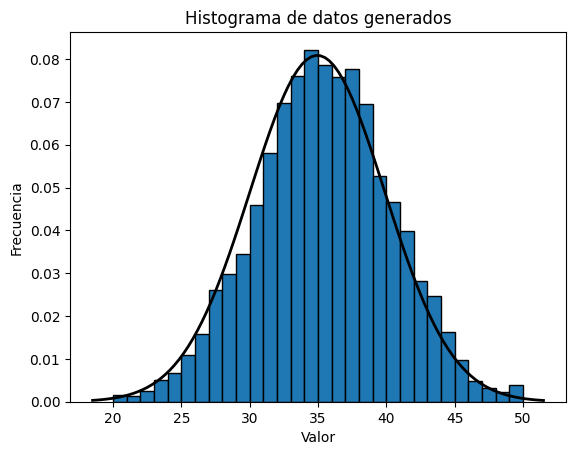

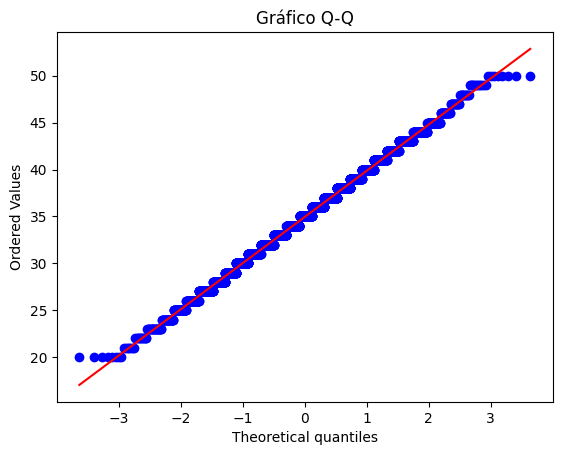

In [56]:
# Prueba de normalidad de D'Agostino-Pearson
k2, p = stats.normaltest(impact['Age'])
print(f'Estadístico K2: {k2}')
print(f'Valor p: {p}')

# Evaluar los resultados de la prueba
alpha = 0.05
if p > alpha:
    print("No se puede rechazar la hipótesis nula: los datos parecen provenir de una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.")

# Visualización del histograma
plt.hist(impact['Age'], bins=30, edgecolor='black', density=True)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos generados')

# Superponer la curva de distribución normal
xmin, xmax = plt.xlim()
mean, std_dev = np.mean(impact['Age']), np.std(impact['Age'])
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

# Gráfico Q-Q (Quantile-Quantile plot)
stats.probplot(impact['Age'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

#### Esto se traduce a que los encuestados como son trabajadores, lo más 'normal' que podía pasar es que las edades más populares estuviesen en los datos centrales y los menos en las esquinas, dado que sobre los 20 se empieza en el mundo laboral y ya luego cerca de los 50 es menos frecuente que continúe su vida profesional.

### Ya hemos probado que las edades distribuyen normal. Ahora haremos algunos análisis


##### Utilizaremos como estimador puntual de la media a $\overline{x} = \frac{1}{n}\sum{x_i}$, pues es insesgado, consistente y eficiente.

calculemos $\overline{x}$: 

In [57]:
mean_age = np.mean(impact['Age'])
print(f"Estimador puntual de la media: {mean_age}")

Estimador puntual de la media: 34.9508


##### Utilizaremos como estimador puntual de la varianza a $S^2 = \frac{1}{n-1}\sum{(x_i - \overline{x})^2}$, pues es insesgado, consistente y eficiente. Demostración:

calculemos $S^2$:

In [58]:
std_dev_age = np.std(impact['Age'], ddof=1)
print(f"Estimador puntual de la varianza: {std_dev_age**2}");

Estimador puntual de la varianza: 24.33684672934587


##### Con los estimadores puntuales de la media y la varianza calculados, podemos también estimar la media poblacional por intervalo de confianza. Para ello utilicemos una seguridad del 95%. Como sabemos que la edad distribuye normal podemos utilizar el intervalo de confianza siguiente: 

$$\mu \in [\overline{x} - \frac{S}{\sqrt{n}}Z_{1-\frac{\alpha}{2}}, 
           \overline{x} + \frac{S}{\sqrt{n}}Z_{1-\frac{\alpha}{2}}
]$$

In [59]:
alpha = 0.05
n = len(impact['Age'])
Z = stats.norm.ppf(1 - alpha/2)
e = (std_dev_age / np.sqrt(n)) * Z

lower_bound = mean_age - e
upper_bound = mean_age + e
print(f"El intervalo de confianza de la media es [{lower_bound}, {upper_bound}]" +
    "con 95% de seguridad.") 


El intervalo de confianza de la media es [34.81406010491716, 35.08753989508284]con 95% de seguridad.


##### Con los estimadores puntuales de la media y la varianza calculados, podemos también estimar la varianza poblacional por intervalo de confianza. Para ello utilicemos una seguridad del 95%. Como sabemos que la edad distribuye normal podemos utilizar el intervalo de confianza siguiente: 

$$\sigma^2 \in [\frac{(n-1)S^2}{\chi^2_{1-\frac{\alpha}{2}}(n-1)},
                \frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2}}(n-1)}
]$$

In [60]:
S2 = std_dev_age**2

# Valores críticos de la distribución chi-cuadrado
chi2_lower = stats.chi2.ppf(1 - alpha/2, n - 1)
chi2_upper = stats.chi2.ppf(alpha/2, n - 1)

# Calcular el intervalo de confianza para la varianza
lower_bound = (n - 1) * S2 / chi2_lower
upper_bound = (n - 1) * S2 / chi2_upper

print(f"El intervalo de confianza para la varianza poblacional es: [{lower_bound}, {upper_bound}]")

El intervalo de confianza para la varianza poblacional es: [23.410251414331743, 25.31983614928917]


##### Veamos qué sucede con la media de edad en las mujeres trabajadoras. Antes de hacer alguna prueba de hipótesis debemos ver si las edades entre las mujeres distribuyen normal

In [61]:
women_impact = impact[impact['Gender'] == 'Female']
women_ages = women_impact['Age']

Estadístico K2: 1.423081519106478
Valor p: 0.49088727523424924
No se puede rechazar la hipótesis nula: los datos parecen provenir de una distribución normal.


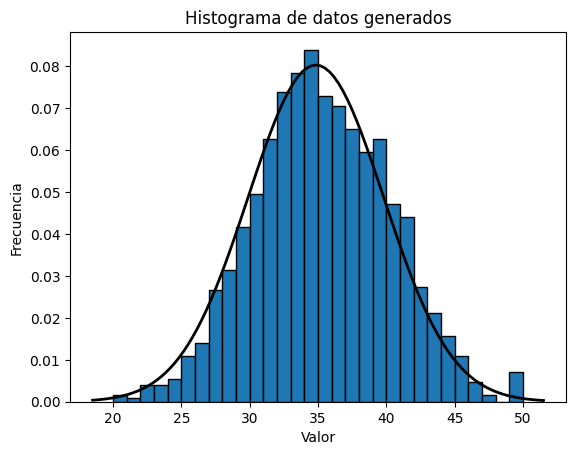

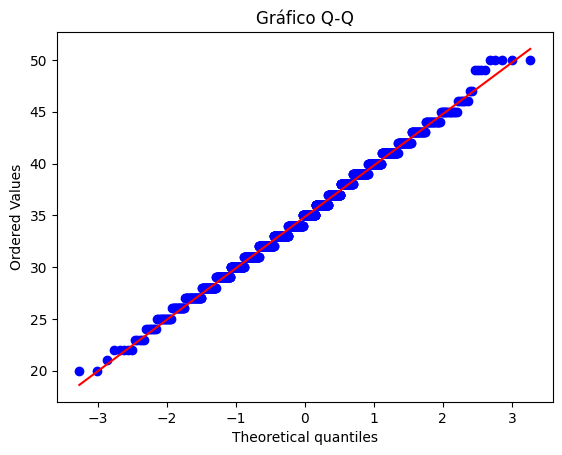

In [62]:
# Prueba de normalidad de D'Agostino-Pearson
k2, p = stats.normaltest(women_ages)
print(f'Estadístico K2: {k2}')
print(f'Valor p: {p}')

# Evaluar los resultados de la prueba
alpha = 0.05
if p > alpha:
    print("No se puede rechazar la hipótesis nula: los datos parecen provenir de una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.")

# Visualización del histograma
plt.hist(women_ages, bins=30, edgecolor='black', density=True)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos generados')

# Superponer la curva de distribución normal
xmin, xmax = plt.xlim()
mean, std_dev = np.mean(women_ages), np.std(women_ages)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

# Gráfico Q-Q (Quantile-Quantile plot)
stats.probplot(women_ages, dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

Una vez demostrado que las edades de las mujeres distribuyen normal, hagamos una prueba de hipótesis: queremos probar que la media de edad entre las mujeres es menor de 40 años con un nivel de significancia del 95%

$$H_0: \mu \geq 40$$

$$H_1: \mu < 40$$

Estadígrafo: $$T = \frac{\overline{X} - \mu_0}{S} \sqrt{n}$$

Región crítica (n > 30): $$T < -Z_{1-\alpha}$$

In [63]:
mean_age = np.mean(women_ages)
std_dev_age = np.std(women_ages)

population_mean = 40

T = ((mean_age - population_mean) * np.sqrt(n)) / (std_dev_age)

# Paso 4: Determinar si T pertenece a la región crítica
Z = stats.norm.ppf(1 - alpha)

# Paso 5: Tomar una decisión sobre la hipótesis nula
if T < -Z:
    print("Se rechaza la hipótesis nula: la media de las edades es menor de 40.")
else:
    print("No se puede rechazar la hipótesis nula: la media de las edades no es significativamente menor de 40.")

print(f'Estadístico T: {T}')

Se rechaza la hipótesis nula: la media de las edades es menor de 40.
Estadístico T: -73.42276899663328


### Ahora veamos que ocurre con la media de horas de trabajo por semana de los hombres y los demas géneros. Antes de hacer alguna prueba de hipótesis debemos ver si estos valores distribuyen normal.



In [64]:
men_hours = impact[impact['Gender'] == 'Male']['Hours_Worked_Per_Week']
non_men_hours = impact[impact['Gender'] != 'Male']['Hours_Worked_Per_Week']

Estadístico K2 (Hombres): 5.458997227750453
Valor p (Hombres): 0.0652519979140798
No se puede rechazar la hipótesis nula para hombres: los datos parecen provenir de una distribución normal.
Estadístico K2 (No Hombres): 0.5625627544225925
Valor p (No Hombres): 0.754815917598898
No se puede rechazar la hipótesis nula para no hombres: los datos parecen provenir de una distribución normal.


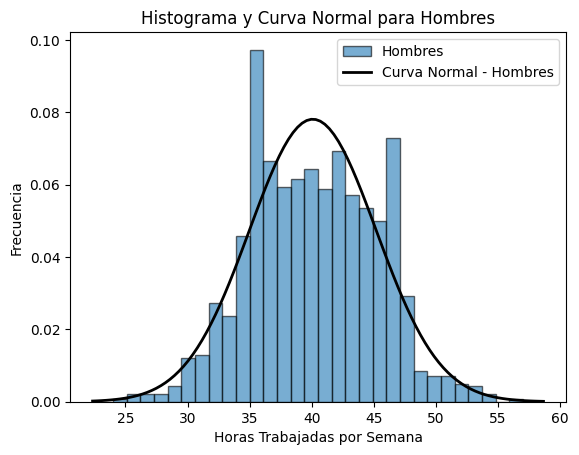

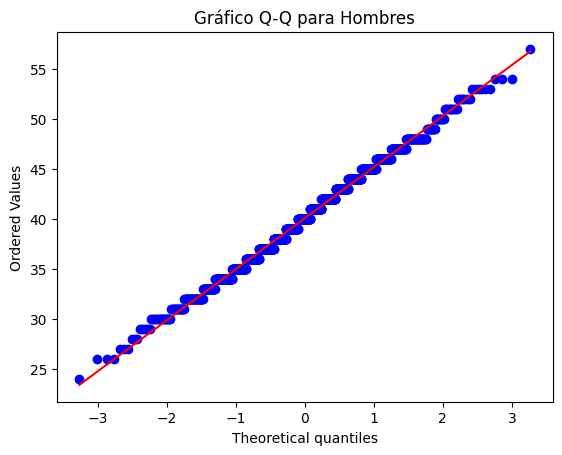

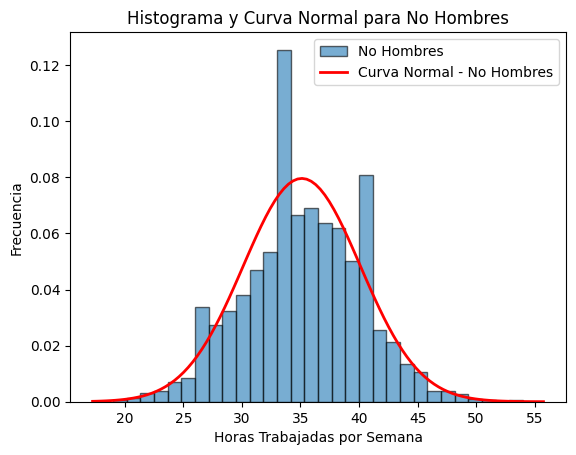

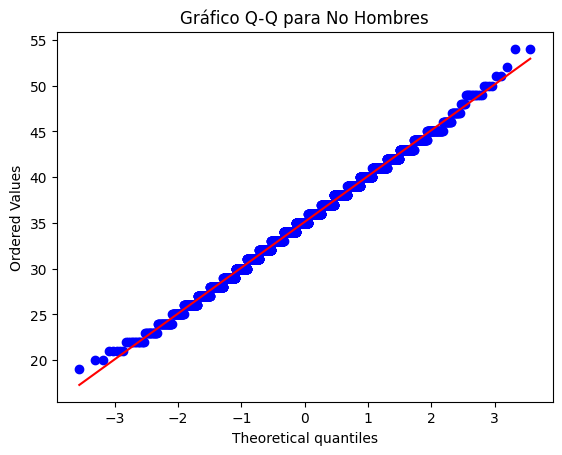

In [65]:
# Prueba de normalidad de D'Agostino-Pearson para hombres
k2_men, p_men = stats.normaltest(men_hours)
print(f'Estadístico K2 (Hombres): {k2_men}')
print(f'Valor p (Hombres): {p_men}')

# Evaluar los resultados de la prueba para hombres
if p_men > alpha:
    print("No se puede rechazar la hipótesis nula para hombres: los datos parecen provenir de una distribución normal.")
else:
    print("Se rechaza la hipótesis nula para hombres: los datos no parecen provenir de una distribución normal.")

# Prueba de normalidad de D'Agostino-Pearson para no hombres
k2_non_men, p_non_men = stats.normaltest(non_men_hours)
print(f'Estadístico K2 (No Hombres): {k2_non_men}')
print(f'Valor p (No Hombres): {p_non_men}')

# Evaluar los resultados de la prueba para no hombres
if p_non_men > alpha:
    print("No se puede rechazar la hipótesis nula para no hombres: los datos parecen provenir de una distribución normal.")
else:
    print("Se rechaza la hipótesis nula para no hombres: los datos no parecen provenir de una distribución normal.")
# Histograma y curva de distribución para hombres
plt.hist(men_hours, bins=30, edgecolor='black', density=True, alpha=0.6, label='Hombres')
xmin, xmax = plt.xlim()
mean, std_dev = np.mean(men_hours), np.std(men_hours)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Curva Normal - Hombres')
plt.xlabel('Horas Trabajadas por Semana')
plt.ylabel('Frecuencia')
plt.title('Histograma y Curva Normal para Hombres')
plt.legend()
plt.show()

# Gráfico Q-Q para hombres
stats.probplot(men_hours, dist="norm", plot=plt)
plt.title('Gráfico Q-Q para Hombres')
plt.show()
# Histograma y curva de distribución para no hombres
plt.hist(non_men_hours, bins=30, edgecolor='black', density=True, alpha=0.6, label='No Hombres')
xmin, xmax = plt.xlim()
mean, std_dev = np.mean(non_men_hours), np.std(non_men_hours)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'r', linewidth=2, label='Curva Normal - No Hombres')
plt.xlabel('Horas Trabajadas por Semana')
plt.ylabel('Frecuencia')
plt.title('Histograma y Curva Normal para No Hombres')
plt.legend()
plt.show()

# Gráfico Q-Q para no hombres
stats.probplot(non_men_hours, dist="norm", plot=plt)
plt.title('Gráfico Q-Q para No Hombres')
plt.show()


Una vez demostrado que las horas trabajadas por semana de los hombres y demas géneros distribuyen normal, hagamos una prueba de hipótesis para dos poblaciones: queremos probar que la media de trabajo de los hombres es superior a los demas géneros con un nivel de significancia del 95%.


$$H_0: \mu_{\text{hombres}} \leq \mu_{\text{no hombres}}$$

$$H_1: \mu_{\text{hombres}} > \mu_{\text{no hombres}}$$

**Estadígrafo:**

$$T = \frac{\overline{X}_1 - \overline{X}_2}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}}$$

**Región crítica (n > 30):**

$$T > Z_{1-\alpha}$$



In [66]:
# Cálculos para los hombres
mean_men = np.mean(men_hours)
std_dev_men = np.std(men_hours)
n_men = len(men_hours)

# Cálculos para los otros géneros
mean_non_men = np.mean(non_men_hours)
std_dev_non_men = np.std(non_men_hours)
n_non_men = len(non_men_hours)

# Hipótesis nula: La media de los hombres es menor o igual a la de los otros géneros
population_mean = mean_non_men  # Utilizamos la media de los no hombres como referencia

# Estadístico T para comparar medias
T = (mean_men - population_mean) / (np.sqrt((std_dev_men**2 / n_men) + (std_dev_non_men**2 / n_non_men)))

# Nivel de significancia
alpha = 0.05

# Región crítica para prueba unilateral
Z = stats.norm.ppf(1 - alpha)

# Comparar el estadístico T con el valor crítico
if T > Z:
    print("Se rechaza la hipótesis nula: la media de las horas trabajadas por los hombres es mayor que la de los otros géneros.")
else:
    print("No se puede rechazar la hipótesis nula: la media de las horas trabajadas por los hombres no es significativamente mayor que la de los otros géneros.")

print(f'Estadístico T: {T}')


Se rechaza la hipótesis nula: la media de las horas trabajadas por los hombres es mayor que la de los otros géneros.
Estadístico T: 30.064449903280977


La prueba de hipótesis indica que los hombres tienden a trabajar más horas de media a la semana que otros géneros en esta muestra, subrayando la necesidad de abordar los posibles riesgos que este comportamiento puede tener en su salud mental. Es fundamental que tanto los empleadores como los empleados consideren el equilibrio entre el trabajo y la vida personal como una prioridad, para prevenir el estrés crónico, el agotamiento y otros problemas relacionados con la salud mental. A largo plazo, promover una cultura laboral que valore el bienestar de los empleados puede ser esencial para mejorar la salud mental de los hombres y de la fuerza laboral en general.
